<a href="https://colab.research.google.com/github/pachterlab/monod/blob/nn-integration/nn_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf monod

In [2]:
!git clone -b nn-integration https://github.com/pachterlab/monod.git

Cloning into 'monod'...
remote: Enumerating objects: 636, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 636 (delta 155), reused 241 (delta 132), pack-reused 343
Receiving objects: 100% (636/636), 1.99 MiB | 22.67 MiB/s, done.
Resolving deltas: 100% (341/341), done.


In [3]:
import sys
sys.path.insert(0, '/content/monod/src')

In [4]:
import monod
from monod import cme_toolbox

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
b = 10
beta = 1.4
gamma = 0.5
p = np.log10(np.asarray([b,beta,gamma]))

In [7]:
limits = [100,50]

In [8]:
model_baseline = monod.cme_toolbox.CMEModel('Bursty','None')

In [9]:
Pss_baseline = model_baseline.eval_model_pss(p,limits)

(-0.5, 30.5)

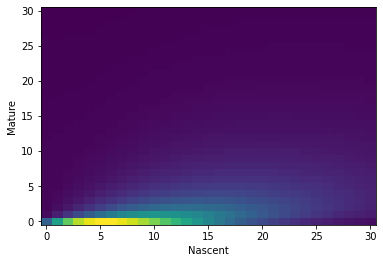

In [10]:
plt.imshow(np.log10(Pss_baseline),aspect='auto')
plt.imshow((Pss_baseline),aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Nascent')
plt.ylabel('Mature')
plt.xlim([-0.5,30.5])
plt.ylim([-0.5,30.5])

In [11]:
n_cells = 1000
X, Y = np.meshgrid(np.arange(limits[0]), np.arange(limits[1]), indexing="ij")
X = X.flatten()
Y = Y.flatten()
x = np.random.choice(np.arange(len(X)), p=Pss_baseline.flatten(), size=n_cells, replace=True)
raw_counts = np.zeros((2,n_cells),dtype=int)
raw_counts[0] = X[x]
raw_counts[1] = Y[x]


In [12]:
raw_counts

array([[11,  6,  7, ...,  0,  5,  1],
       [19,  9, 23, ...,  7, 10, 29]])

In [13]:
unique, unique_counts = np.unique(
    np.vstack(raw_counts).T, axis=0, return_counts=True
)
frequencies = unique_counts / n_cells
unique = unique.astype(int)
data = (unique, frequencies)


In [14]:
model_baseline.eval_model_kld(p, limits, "None", data)

0.6898889803655291

Text(0, 0.5, 'KLD')

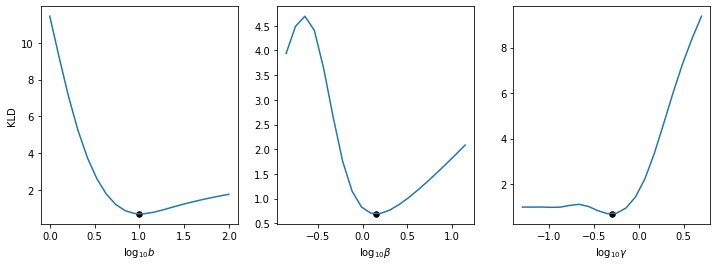

In [15]:
fig1,ax1=plt.subplots(1,3,figsize=(12,4))
param_names = model_baseline.get_log_name_str()
for k in range(3):
    # for 
    domain = p[k] + np.linspace(-1,1,20)
    kld = []
    for d in domain:
        p_ = np.copy(p)
        p_[k] = d
        kld_ = model_baseline.eval_model_kld(p_, limits, "None", data)
        kld.append(kld_)
    ax1[k].plot(domain,kld)
    kld_ = model_baseline.eval_model_kld(p, limits, "None", data)
    ax1[k].scatter(p[k],kld_,30,'k')
    ax1[k].set_xlabel(param_names[k])
ax1[0].set_ylabel('KLD')

In [16]:
model_nn = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn_10')

In [17]:
Pss = model_nn.eval_model_pss(p,limits)
kld_nn = model_nn.eval_model_kld(p, limits, "None", data)

In [18]:
Pss.sum()

0.9684252434697637

In [19]:
import scipy 

In [20]:
#Pss = Pss/np.sum(Pss)

In [21]:
Pss

array([[4.95860627e-03, 7.12463982e-03, 9.27032292e-03, ...,
        2.51236805e-05, 2.14276000e-05, 1.82977048e-05],
       [3.77389161e-04, 8.96786961e-04, 1.66892938e-03, ...,
        5.89444084e-05, 5.07797380e-05, 4.38042104e-05],
       [1.75260259e-04, 4.15700606e-04, 7.85532520e-04, ...,
        8.82180183e-05, 7.57568861e-05, 6.51633663e-05],
       ...,
       [4.43645654e-10, 9.38773538e-10, 1.77052908e-09, ...,
        6.32368217e-08, 6.15419965e-08, 5.97910220e-08],
       [3.98614435e-10, 8.41852781e-10, 1.58600939e-09, ...,
        5.73913753e-08, 5.58721642e-08, 5.43008355e-08],
       [3.58202386e-10, 7.54911757e-10, 1.42051045e-09, ...,
        5.20863632e-08, 5.07244479e-08, 4.93141971e-08]])

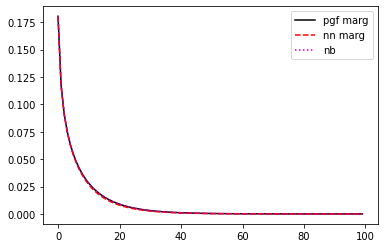

In [22]:

plt.plot(Pss_baseline.sum(1),'k-',label='pgf marg')
plt.plot(Pss.sum(1),'r--',label='nn marg')
x = np.arange(len(Pss))
y = scipy.stats.nbinom.pmf(x,1/beta,1/(1+b))
plt.plot(y,'m:',label='nb')
plt.legend()

(-0.5, 30.5)

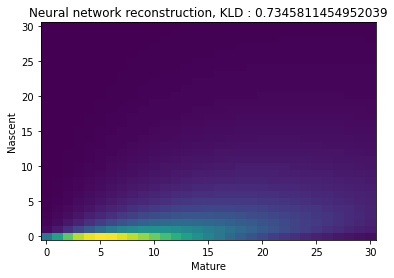

In [23]:
plt.title(f'Neural network reconstruction, KLD : {kld_nn}')
plt.imshow(np.log10(Pss),aspect='auto')
plt.imshow((Pss),aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Mature')
plt.ylabel('Nascent')
plt.xlim([-0.5,30.5])
plt.ylim([-0.5,30.5])

In [24]:
model_nn_10 = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn_10')
Pss = model_nn_10.eval_model_pss(p,limits)
kld_nn_10 = model_nn_10.eval_model_kld(p, limits, "None", data)

In [25]:
Pss.sum()

0.9684252434697637

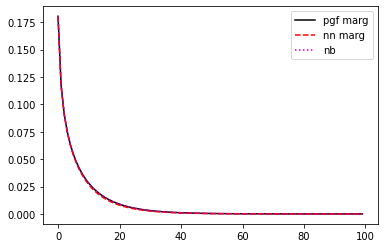

In [26]:
plt.plot(Pss_baseline.sum(1),'k-',label='pgf marg')
plt.plot(Pss.sum(1),'r--',label='nn marg')
x = np.arange(len(Pss))
y = scipy.stats.nbinom.pmf(x,1/beta,1/(1+b))
plt.plot(y,'m:',label='nb')
plt.legend()

(-0.5, 30.5)

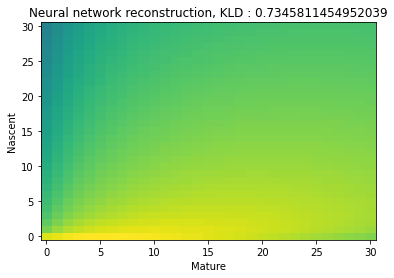

In [27]:
plt.title(f'Neural network reconstruction, KLD : {kld_nn}')
plt.imshow(np.log10(Pss),aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Mature')
plt.ylabel('Nascent')
plt.xlim([-0.5,30.5])
plt.ylim([-0.5,30.5])

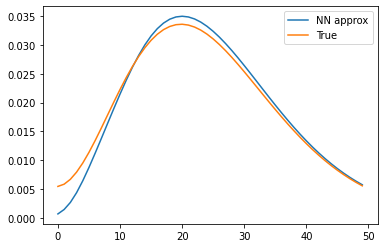

In [28]:
N = 10
plt.plot(Pss[N,:]/np.sum(Pss[N,:]),label = 'NN approx')
plt.plot(Pss_baseline[N,:]/np.sum(Pss_baseline[N,:]),label='True')
plt.legend()

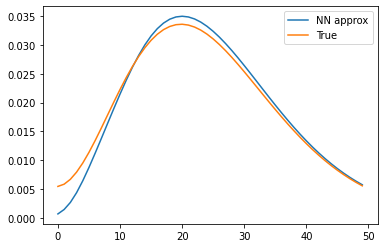

In [29]:
N = 10
plt.plot(Pss[N,:]/np.sum(Pss[N,:]),label = 'NN approx')
plt.plot(Pss_baseline[N,:]/np.sum(Pss_baseline[N,:]),label='True')
plt.legend()

Text(0, 0.5, 'KLD')

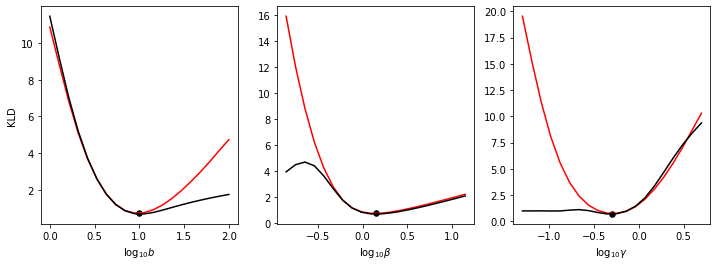

In [30]:
fig1,ax1=plt.subplots(1,3,figsize=(12,4))
param_names = model_nn.get_log_name_str()
for k in range(3):
    # for 
    domain = p[k] + np.linspace(-1,1,20)
    kld = []
    for d in domain:
        p_ = np.copy(p)
        p_[k] = d
        kld_ = model_nn.eval_model_kld(p_, limits, "None", data)
        kld.append(kld_)
    ax1[k].plot(domain,kld,'r-')
    kld_ = model_nn.eval_model_kld(p, limits, "None", data)

    kld = []
    for d in domain:
        p_ = np.copy(p)
        p_[k] = d
        kld_ = model_baseline.eval_model_kld(p_, limits, "None", data)
        kld.append(kld_)
 
    kld_ = model_nn.eval_model_kld(p, limits, "None", data)

    ax1[k].plot(domain,kld,'k-')

    ax1[k].scatter(p[k],kld_,30,'k')
    ax1[k].set_xlabel(param_names[k])
ax1[0].set_ylabel('KLD')

In [31]:
# fig1,ax1=plt.subplots(1,3,figsize=(12,4))
# param_names = model_baseline.get_log_name_str()
# for k in range(3):
#     # for 
#     domain = p[k] + np.linspace(-1,1,20)
#     kld = []
#     for d in domain:
#         p_ = np.copy(p)
#         p_[k] = d
#         kld_ = model_baseline.eval_model_kld(p_, limits, "None", data)
#         kld.append(kld_)
#     ax1[k].plot(domain,kld)
#     kld_ = model_baseline.eval_model_kld(p, limits, "None", data)
#     ax1[k].scatter(p[k],kld_,30,'k')
#     ax1[k].set_xlabel(param_names[k])
# ax1[0].set_ylabel('KLD')

In [32]:
model_const = monod.cme_toolbox.CMEModel('Constitutive','None')

In [33]:
Pss = model_const.eval_model_pss(p[1:],limits)
kld_const = model_const.eval_model_kld(p[1:], limits, "None", data)

Text(0, 0.5, 'Mature')

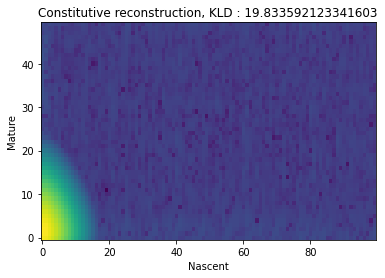

In [34]:
plt.title(f'Constitutive reconstruction, KLD : {kld_const}')
plt.imshow(np.log10(Pss).T,aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Nascent')
plt.ylabel('Mature')